# **Tugas 9 - Pengurangan Dimensi Bertahap pada Dokumen**

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/nittyaa99/ppw

## Install Library

In [ ]:
!pip install pandas nltk Sastrawi scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.9 MB/s eta 0:00:00


## Impor Library
- pandas digunakan untuk membaca file CSV, memanipulasi DataFrame, dan mengolah data.
- re digunakan untuk membersihkan teks dari angka, tanda baca, dan spasi berlebih.
- TfidfVectorizer digunakan untuk mengubah kumpulan dokumen teks menjadi matriks fitur TF-IDF
- TruncatedSVD digunakan untuk melakukan reduksi dimensi pada data yang telah diproses, khususnya pada matriks yang besar

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load Data

In [3]:
data = pd.read_csv('crawl_berita.csv')
data

,Judul,Isi,Tanggal,Kategori
0,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...,Wakil Menteri Keuangan II Thomas Djiwandono me...,"Rabu, 11 Sep 2024 18:10 WIB",Ekonomi
1,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...,Gabungan pengusaha rokok dan petani tembakau m...,"Rabu, 11 Sep 2024 17:31 WIB",Ekonomi
2,IHSG Melemah Tipis ke 7.760 Sore Ini,Indeks Harga Saham Gabungan (IHSG) ditutup di ...,"Rabu, 11 Sep 2024 16:37 WIB",Ekonomi
3,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...,Nilai tukar rupiah berada di level Rp15.402 pe...,"Rabu, 11 Sep 2024 16:24 WIB",Ekonomi
4,Sri Mulyani Usai Nonton Timnas-Australia: Teri...,Menteri Keuangan Sri MulyaniÂ berkomentar soal...,"Rabu, 11 Sep 2024 15:47 WIB",Ekonomi
...,...,...,...,...
95,Hasil Liga 1: PSM vs Persib Sama Kuat,PSM Makassar harus puas berbagi satu angka usa...,"Rabu, 11 Sep 2024 17:25 WIB",Olahraga
96,"Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med...",Presiden Joko Widodo (Jokowi) menyerahkan bonu...,"Rabu, 11 Sep 2024 17:13 WIB",Olahraga
97,Megawati Ungkap Target di Liga Korea: Jadi Pem...,Megawati Hangestri Pertiwi mengungkapkan targe...,"Rabu, 11 Sep 2024 16:49 WIB",Olahraga
98,Media Vietnam: Indonesia Buat Kejutan Besar La...,Media Vietnam memuji performa Timnas Indonesia...,"Rabu, 11 Sep 2024 16:24 WIB",Olahraga


## Pengacakan Urutan Data

In [4]:
df_acak = data.sample(frac=1).reset_index(drop=True)
df_acak

,Judul,Isi,Tanggal,Kategori
0,Respons Indodax Soal Dugaan Kebobolan Rp335 M ...,"Perusahaan Blockchain dan Kripto, Indodax mere...","Rabu, 11 Sep 2024 14:30 WIB",Ekonomi
1,"Media Vietnam: Indonesia Tim Terkuat di ASEAN,...",Media Vietnam mengklaim Timnas Indonesia sebag...,"Rabu, 11 Sep 2024 17:56 WIB",Olahraga
2,Jokowi Resmikan Pembangunan MRT Medan Satria-T...,Presiden Joko Widodo (Jokowi) meresmikan pemba...,"Rabu, 11 Sep 2024 13:01 WIB",Ekonomi
3,Media Vietnam: Indonesia Buat Kejutan Besar La...,Media Vietnam memuji performa Timnas Indonesia...,"Rabu, 11 Sep 2024 16:24 WIB",Olahraga
4,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...,Gabungan pengusaha rokok dan petani tembakau m...,"Rabu, 11 Sep 2024 17:31 WIB",Ekonomi
...,...,...,...,...
95,Media Vietnam: Indonesia Buat Kejutan Besar La...,Media Vietnam memuji performa Timnas Indonesia...,"Rabu, 11 Sep 2024 16:24 WIB",Olahraga
96,Megawati Ungkap Target di Liga Korea: Jadi Pem...,Megawati Hangestri Pertiwi mengungkapkan targe...,"Rabu, 11 Sep 2024 16:49 WIB",Olahraga
97,"Media Australia: Indonesia, Raksasa Tidur yang...",Media Australia memberikan pujian atas penampi...,"Rabu, 11 Sep 2024 13:02 WIB",Olahraga
98,"Media Australia: Indonesia, Raksasa Tidur yang...",Media Australia memberikan pujian atas penampi...,"Rabu, 11 Sep 2024 13:02 WIB",Olahraga


## Menggabungkan Judul dan Isi
menggabungkan judul dan isi akan memberikan lebih banyak informasi yang bisa diproses, yang dapat meningkatkan kualitas analisis seperti klasifikasi teks atau ekstraksi fitur.

In [7]:
titles = data['Judul']
contents = data['Isi']

data['Isi'] = titles + " " + contents

data['Isi']

,Isi
0,Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...
1,Pebisnis Minta Jokowi Cabut Larangan Jual Roko...
2,IHSG Melemah Tipis ke 7.760 Sore Ini IHSG Mele...
3,Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...
4,Sri Mulyani Usai Nonton Timnas-Australia: Teri...
...,...
95,Hasil Liga 1: PSM vs Persib Sama Kuat Hasil Li...
96,"Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med..."
97,Megawati Ungkap Target di Liga Korea: Jadi Pem...
98,Media Vietnam: Indonesia Buat Kejutan Besar La...


## Pembagian Data Training dan Data Testing Sebelum Preprocessing

In [18]:
X = data['Isi']
y = data['Kategori']

# split data 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData training (X_train):")
print(X_train.head())

print("\nLabel training (y_train):")
print(y_train.head())

print("\nData testing (X_test):")
print(X_test.head())

print("\nLabel testing (y_test):")
print(y_test.head())


Data training (X_train):
55    Jokowi Beri Bonus Rp36,25 Miliar ke Peraih Med...
88    Media Australia: Indonesia, Raksasa Tidur yang...
26    Sri Mulyani Usai Nonton Timnas-Australia: Teri...
42    Pertemuan Sri Mulyani-Prabowo Tak Banyak Bahas...
69    Alasan STY Mainkan Wahyu 'Hulk' Ketimbang Asna...
Name: Isi, dtype: object

Label training (y_train):
55    Olahraga
88    Olahraga
26     Ekonomi
42     Ekonomi
69    Olahraga
Name: Kategori, dtype: object

Data testing (X_test):
83    Link Live Streaming PSM Makassar vs Persib Ban...
53    Hasil Liga 1: Bali United vs Arema Tanpa Pemen...
70    Berapa Poin Aman Timnas Indonesia untuk Lolos ...
45    Rupiah Menguat Rp15.402 per Dolar AS Usai Deba...
44    IHSG Melemah Tipis ke 7.760 Sore Ini IHSG Mele...
Name: Isi, dtype: object

Label testing (y_test):
83    Olahraga
53    Olahraga
70    Olahraga
45     Ekonomi
44     Ekonomi
Name: Kategori, dtype: object


## Mengonversi Semua Huruf Besar Menjadi Huruf Kecil

In [19]:
def clean_lower(text):
    if isinstance(text, str):
        return text.lower()
    return text

X_train = X_train.apply(clean_lower)
X_test = X_test.apply(clean_lower)

print("Data training setelah diubah menjadi huruf kecil:")
print(X_train.head())

print("\nData testing setelah diubah menjadi huruf kecil:")
print(X_test.head())

Data training setelah diubah menjadi huruf kecil:
55    jokowi beri bonus rp36,25 miliar ke peraih med...
88    media australia: indonesia, raksasa tidur yang...
26    sri mulyani usai nonton timnas-australia: teri...
42    pertemuan sri mulyani-prabowo tak banyak bahas...
69    alasan sty mainkan wahyu 'hulk' ketimbang asna...
Name: Isi, dtype: object

Data testing setelah diubah menjadi huruf kecil:
83    link live streaming psm makassar vs persib ban...
53    hasil liga 1: bali united vs arema tanpa pemen...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp15.402 per dolar as usai deba...
44    ihsg melemah tipis ke 7.760 sore ini ihsg mele...
Name: Isi, dtype: object


## Menghapus Simbol dan Angka dari Teks

In [ ]:
def clean_punct(text):
    if isinstance(text, str):
        clean_patterns = re.compile(r'[0-9]|[/(){}\[\]\|@,;_]|[^a-z ]')
        text = clean_patterns.sub(' ', text)
        return text
    return text

X_train = X_train.apply(clean_punct)
X_test = X_test.apply(clean_punct)

print("Data training setelah dibersihkan:")
print(X_train.head())

print("\nData testing setelah dibersihkan:")
print(X_test.head())

Data training setelah dibersihkan:
55    jokowi beri bonus rp miliar ke peraih medali p...
88    media australia indonesia raksasa tidur yang m...
26    sri mulyani usai nonton timnas australia terim...
42    pertemuan sri mulyani prabowo tak banyak bahas...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah dibersihkan:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema tanpa pemenang...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp per dolar as usai debat trum...
44    ihsg melemah tipis ke sore ini ihsg melemah ti...
Name: Isi, dtype: object


## Menghapus Spasi Awal dan Akhir dari Sebuah String

In [21]:
def _normalize_whitespace(text):
    if isinstance(text, str):
        corrected = re.sub(r'\s+', ' ', text)
        return corrected.strip()
    return text

X_train = X_train.apply(_normalize_whitespace)
X_test = X_test.apply(_normalize_whitespace)

print("Data training setelah normalisasi spasi:")
print(X_train.head())

print("\nData testing setelah normalisasi spasi:")
print(X_test.head())

Data training setelah normalisasi spasi:
55    jokowi beri bonus rp miliar ke peraih medali p...
88    media australia indonesia raksasa tidur yang m...
26    sri mulyani usai nonton timnas australia terim...
42    pertemuan sri mulyani prabowo tak banyak bahas...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah normalisasi spasi:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema tanpa pemenang...
70    berapa poin aman timnas indonesia untuk lolos ...
45    rupiah menguat rp per dolar as usai debat trum...
44    ihsg melemah tipis ke sore ini ihsg melemah ti...
Name: Isi, dtype: object


## Mengurangi Jumlah Kata dalam Sebuah Dokumen

In [22]:
def clean_stopwords(text):
    if isinstance(text, str):
        stopword = set(stopwords.words('indonesian'))
        text = ' '.join(word for word in text.split() if word not in stopword)
        return text.strip()
    return text

X_train = X_train.apply(clean_stopwords)
X_test = X_test.apply(clean_stopwords)

print("Data training setelah menghapus stopwords:")
print(X_train.head())

print("\nData testing setelah menghapus stopwords:")
print(X_test.head())

Data training setelah menghapus stopwords:
55    jokowi bonus rp miliar peraih medali paralimpi...
88    media australia indonesia raksasa tidur bangki...
26    sri mulyani nonton timnas australia terima kas...
42    pertemuan sri mulyani prabowo bahas makan berg...
69    alasan sty mainkan wahyu hulk ketimbang asnawi...
Name: Isi, dtype: object

Data testing setelah menghapus stopwords:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bali united vs arema pemenang hasil...
70    poin aman timnas indonesia lolos piala dunia p...
45    rupiah menguat rp dolar as debat trump harris ...
44    ihsg melemah tipis sore ihsg melemah tipis sor...
Name: Isi, dtype: object


## Mereduksi Kata Menjadi Bentuk Dasar

In [23]:
def sastrawistemmer(text):
    factory = StemmerFactory()
    st = factory.create_stemmer()
    text = ' '.join(st.stem(word) for word in text.split())
    return text

X_train = X_train.apply(sastrawistemmer)
X_test = X_test.apply(sastrawistemmer)

print("Data training setelah stemming:")
print(X_train.head())

print("\nData testing setelah stemming:")
print(X_test.head())

Data training setelah stemming:
55    jokowi bonus rp miliar raih medali paralimpiad...
88    media australia indonesia raksasa tidur bangki...
26    sri mulyani nonton timnas australia terima kas...
42    temu sri mulyani prabowo bahas makan gizi grat...
69    alas sty main wahyu hulk ketimbang asnawi lawa...
Name: Isi, dtype: object

Data testing setelah stemming:
83    link live streaming psm makassar vs persib ban...
53    hasil liga bal united vs arema menang hasil li...
70    poin aman timnas indonesia lolos piala dunia p...
45    rupiah kuat rp dolar as debat trump harris rup...
44    ihsg lemah tipis sore ihsg lemah tipis sore ih...
Name: Isi, dtype: object


## Menampilkan Data Training

In [27]:
train_df = pd.DataFrame({'Content': X_train, 'Cattegory': y_train})
test_df = pd.DataFrame({'Content': X_test, 'Cattegory': y_test})

train_df

,Content,Cattegory
55,jokowi bonus rp miliar raih medali paralimpiad...,Olahraga
88,media australia indonesia raksasa tidur bangki...,Olahraga
26,sri mulyani nonton timnas australia terima kas...,Ekonomi
42,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi
69,alas sty main wahyu hulk ketimbang asnawi lawa...,Olahraga
...,...,...
60,kevin sanjaya sukamuljo masuk hall of fame pb ...,Olahraga
71,menpora tanggap calo tiket laga timnas indones...,Olahraga
14,zulhas legal ekspor kratom zulhas legal ekspor...,Ekonomi
92,media vietnam indonesia tim kuat asean bikin t...,Olahraga


## Menampilkan Data Testing

In [28]:
test_df

,Content,Cattegory
83,link live streaming psm makassar vs persib ban...,Olahraga
53,hasil liga bal united vs arema menang hasil li...,Olahraga
70,poin aman timnas indonesia lolos piala dunia p...,Olahraga
45,rupiah kuat rp dolar as debat trump harris rup...,Ekonomi
44,ihsg lemah tipis sore ihsg lemah tipis sore ih...,Ekonomi
39,harga minyak mentah bangkit terbang badai trop...,Ekonomi
22,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi
80,kevin sanjaya sukamuljo masuk hall of fame pb ...,Olahraga
10,tawar menteri uang temu sri mulyani prabowo ta...,Ekonomi
0,temu sri mulyani prabowo bahas makan gizi grat...,Ekonomi


## Menghitung Matriks TF-IDF
TF-IDF adalah metode yang digunakan dalam NLP untuk mengukur seberapa penting sebuah kata dalam sebuah dokumen dibandingkan dengan seluruh dokumen lainnya 

In [30]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Menampilkan data Training yang sudah di TF-IDF

In [31]:
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,abroad,absolut,acara,achmad,adab,adam,adaptif,adb,adi,adilson,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.036229,0.0,0.0,0.072458,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.049129,0.0,0.0,0.0,0.049129,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.028955,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
76,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
77,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.105536,0.026384
78,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


## Menampilkan Data Testing yang sudah di TF-IDF

In [39]:
tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,abroad,absolut,acara,achmad,adab,adam,adaptif,adb,adi,adilson,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.04541,0.0,0.000000,0.0,0.0,0.04541,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.041508,0.000000,0.0,0.0,0.000000,0.066642,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.040577,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.028955,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## Encoding Label Kategori untuk Logistic Regression
Encoding adalah proses mengubah data kategorikal (seperti teks atau label) menjadi bentuk numerik yang dapat dipahami oleh model.

In [ ]:
label_encoder = preprocessing.LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Inisialisasi Hasil Akurasi pada Berbagai Dimensi

In [41]:
accuracy_results = []

current_dim = X_train_tfidf.shape[1]

## Pengujian Akurasi Logistic Regression dengan Pengurangan Dimensi Bertahap
Truncated SVD adalah teknik reduksi dimensi yang memproyeksikan data ke ruang dimensi yang lebih kecil sambil tetap mempertahankan informasi sebanyak mungkin. SVD memecah matriks data besar menjadi tiga matriks kecil berdasarkan singular value-nya. Singular Value adalah nilai numerik yang diperoleh dari dekomposisi matriks yang memberikan informasi penting tentang struktur matriks (tingkat variabilitas data dan pentingnya komponen tertentu dalam data). 

In [42]:
# Looping untuk mengurangi jumlah dimensi sebanyak 20 pada setiap iterasi
while current_dim >= 100:
    print(f"Reducing dimensions to {current_dim}")

    # Inisialisasi dan fit SVD
    svd = TruncatedSVD(n_components=current_dim, random_state=42)

    # Lakukan reduksi dimensi pada data training dan testing
    X_train_lsa = svd.fit_transform(X_train_tfidf)
    X_test_lsa = svd.transform(X_test_tfidf)

    # Melatih model Logistic Regression pada data yang telah direduksi
    lr_model = LogisticRegression()
    lr_model.fit(X_train_lsa, y_train_encoded)

    # Prediksi pada data testing
    y_pred = lr_model.predict(X_test_lsa)

    # Menghitung akurasi dan menambahkannya ke dalam list
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_results.append({"Dimensions": current_dim, "Accuracy": accuracy})

    # Menampilkan accuracy untuk setiap current_dim
    print(f"Accuracy with {current_dim} components: {accuracy}")

    # Kurangi jumlah dimensi sebanyak 20 untuk iterasi berikutnya
    current_dim -= 20

Reducing dimensions to 1879
Accuracy with 1879 components: 0.95
Reducing dimensions to 1859
Accuracy with 1859 components: 0.95
Reducing dimensions to 1839
Accuracy with 1839 components: 0.95
Reducing dimensions to 1819
Accuracy with 1819 components: 0.95
Reducing dimensions to 1799
Accuracy with 1799 components: 0.95
Reducing dimensions to 1779
Accuracy with 1779 components: 0.95
Reducing dimensions to 1759
Accuracy with 1759 components: 0.95
Reducing dimensions to 1739
Accuracy with 1739 components: 0.95
Reducing dimensions to 1719
Accuracy with 1719 components: 0.95
Reducing dimensions to 1699
Accuracy with 1699 components: 0.95
Reducing dimensions to 1679
Accuracy with 1679 components: 0.95
Reducing dimensions to 1659
Accuracy with 1659 components: 0.95
Reducing dimensions to 1639
Accuracy with 1639 components: 0.95
Reducing dimensions to 1619
Accuracy with 1619 components: 0.95
Reducing dimensions to 1599
Accuracy with 1599 components: 0.95
Reducing dimensions to 1579
Accuracy wit

## Tabel Hasil Akurasi Berdasarkan Reduksi Dimensi

In [43]:
accuracy_df = pd.DataFrame(accuracy_results)

accuracy_df

,Dimensions,Accuracy
0,1879,0.95
1,1859,0.95
2,1839,0.95
3,1819,0.95
4,1799,0.95
...,...,...
84,199,0.95
85,179,0.95
86,159,0.95
87,139,0.95


## Pengaruh Jumlah Dimensi terhadap Akurasi Model

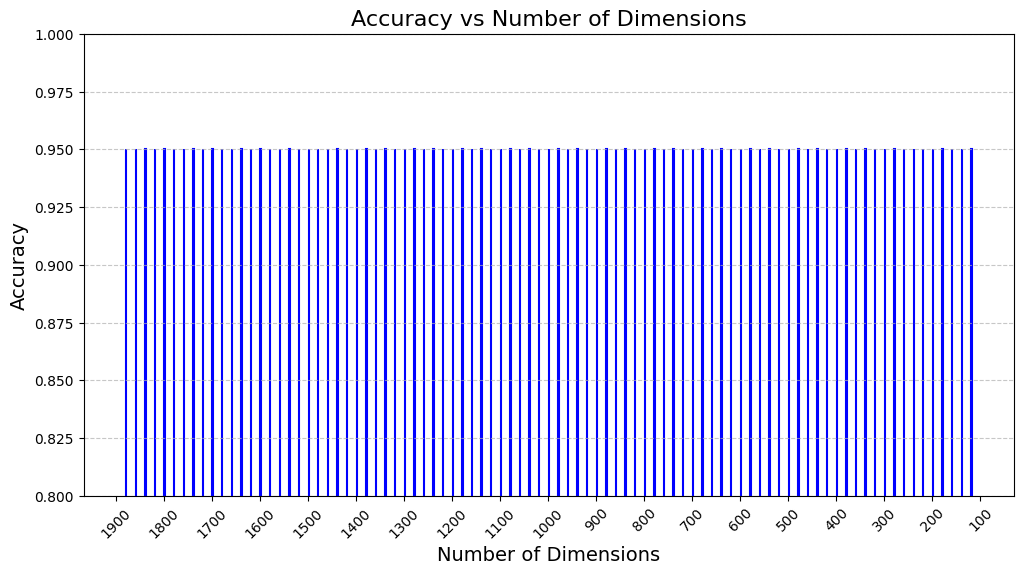

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(accuracy_df["Dimensions"], accuracy_df["Accuracy"], color='skyblue', edgecolor='blue', linewidth=1.5)
plt.title("Accuracy vs Number of Dimensions", fontsize=16)
plt.xlabel("Number of Dimensions", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.ylim(0.8, 1.0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().invert_xaxis()

plt.xticks(range(100, 2000, 100), rotation=45)

plt.show()